**Parisha Agrawal**

**2021270**

# Q2) Linear Regression 

**Importing libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

**Getting Data**

In [2]:
df = pd.read_csv('Q2_insurance_dataset.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset = pd.DataFrame(df, columns=["age","sex", "bmi", "children","smoker","region","charges"])
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Replacing some values (in 'sex','smoker','region') like replacing female, male in sex as 1,0 (as it is easier to get their values as a number to calculate the predicted charges for testing samples)

In [5]:
dataset['sex'] = dataset['sex'].replace(['male','female'],['1','0'])
dataset['smoker'] = dataset['smoker'].replace(['yes','no'],['1','0'])
dataset['region'] = dataset['region'].replace(['southwest','southeast','northwest','northeast'],['3','2','1','0'])
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**Ploting a graph for charges**

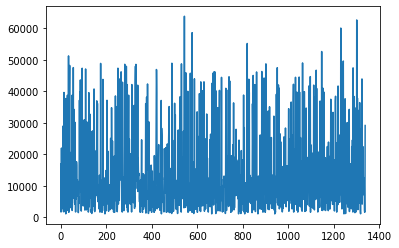

In [6]:
# dataset.drop(['sex','smoker','region','children','bmi','age'],axis=1)
dataset['charges'].plot()
plt.show()

**Splitting data into training and testing**

In [7]:
X = dataset.drop(["charges"], axis=1)
y = dataset["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Building and Training Model**

In [8]:
linear_model = LinearRegression()
linear_model.fit(X_train , y_train)

LinearRegression()

In [9]:
# for index1,colName in enumerate(X_train.columns):
#     print(f"The coefficient for {colName} is {linear_model.coef_[index1]}")

**Predicting outcomet**

In [10]:
y_predicted = linear_model.predict(X_test)
pred = pd.DataFrame(X_test)
pred['cost'] = y_test
pred['PredictedCost'] = y_predicted
pred
# y_predicted

,age,sex,bmi,children,smoker,region,cost,PredictedCost
764,45,0,25.175,2,0,0,9095.06825,8924.407244
887,36,0,30.020,0,0,1,5272.17580,7116.295018
890,64,0,26.885,0,1,1,29330.98315,36909.013521
1293,46,1,25.745,3,0,1,9301.89355,9507.874691
259,19,1,31.920,0,1,1,33750.29180,27013.350008
...,...,...,...,...,...,...,...,...
109,63,1,35.090,0,1,2,47055.53210,39116.968669
575,58,0,27.170,0,0,1,12222.89830,11814.555568
535,38,1,28.025,1,0,0,6067.12675,7638.107736
543,54,0,47.410,0,1,2,63770.42801,40959.081722


**Finding Accuracy of Model**

In [11]:
print(pd.DataFrame({"actual":y_test.squeeze(),"pred":y_predicted.squeeze()}))

           actual          pred
764    9095.06825   8924.407244
887    5272.17580   7116.295018
890   29330.98315  36909.013521
1293   9301.89355   9507.874691
259   33750.29180  27013.350008
...           ...           ...
109   47055.53210  39116.968669
575   12222.89830  11814.555568
535    6067.12675   7638.107736
543   63770.42801  40959.081722
846    9872.70100  12258.228529

[268 rows x 2 columns]


In [12]:
# y_predicted

In [13]:
rmse = mean_squared_error(y_test, y_predicted)
rmse

33635210.431178406

**Finding Mean absolute error**

In [14]:
me = mean_absolute_error(y_test, y_predicted)
me

4186.508898366432

**Linear Relationship of each column used for training with predicted variable using graph**

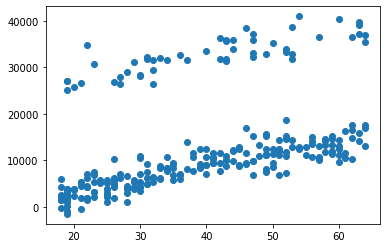

In [15]:
plt.scatter(X_test['age'],y_predicted)
plt.show()

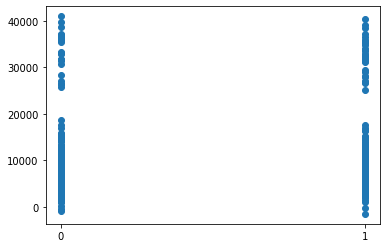

In [16]:
plt.scatter(X_test['sex'],y_predicted)
plt.show()

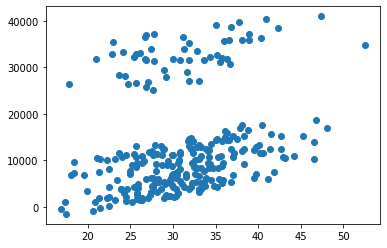

In [17]:
plt.scatter(X_test['bmi'],y_predicted)
plt.show()

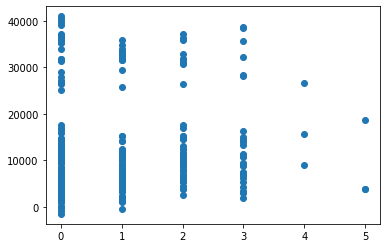

In [18]:
plt.scatter(X_test['children'],y_predicted)
plt.show()

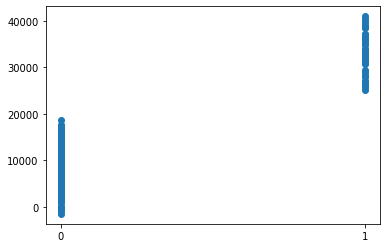

In [19]:
plt.scatter(X_test['smoker'],y_predicted)
plt.show()

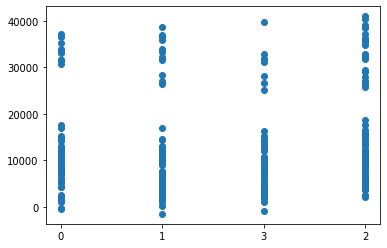

In [20]:
plt.scatter(X_test['region'],y_predicted)
plt.show()